In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [2]:
# set_matplotlib_formats('png', 'svg')

In [3]:
# from nbconvert import HTMLExporter
# import codecs
# import nbformat
# exporter = HTMLExporter()
# output_notebook = nbformat.read(read_file, as_version=4)
# output, resources = exporter.from_notebook_node(output_notebook)
# codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [4]:
# mpl.rcParams['figure.figsize'] = [8.0, 6.0]
# mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 600
# %config InlineBackend.figure_format = 'svg'

## Bivar GOF

In [5]:
x=arange(1,9)
gmm_rsquare = [0.992,0.992,0.994,0.998,0.990,0.994,0.996,0.960]
empirical_rsquare=[0.985,0.962,0.975,0.989,0.991,0.974,0.980,0.981]
plot(x, gmm_rsquare, label='GMM')
plot(x, empirical_rsquare, label='Empirical')
plt.axis([1,8,0.95,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True, figsize=(6,5))

plt.figure()
gmm_ks=[0.016,0.019,0.010,0.005,0.024,0.016,0.012,0.024]
empirical_ks=[0.027,0.072,0.036,0.027,0.020,0.042,0.034,0.014]
plot(x, gmm_ks, label='GMM')
plot(x, empirical_ks, label='Empirical')
plt.axis([1,8,0,0.1])
plt_configure(xlabel='Location Number', ylabel="K-S", legend=True, figsize=(6,5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADMoAAAppCAYAAADVh3FhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AABcRgAAXEYBFJRDQQAAIABJREFUeJzs3Wl41fWZN/A7CwlLgLCJIEFlse4rgtRS91apVbSjtGKt
o3Vpq52rLnXB1nGrT7UzdapedRw7das1HQeoile1o8IgFZQilU0tCIgIAgmBJEBCkvO8mMc+dso5
Jwnn5MDJ53NdvuH+/e/f16MX50X48i9IJBKJAAAAAAAAAAAAAAAAgD1cYa4DAAAAAAAAAAAAAAAA
QCYoygAAAAAAAAAAAAAAAJAXFGUAAAAAAAAAAAAAAADIC4oyAAAAAAAAAAAAAAAA5AVFGQAAAAAA
AAAAAAAAAPKCogwAAAAAAAAAAAAAAAB5QVEGAAAAAAAAAAAAAACAvKAoAwAAAAAAAAAAAAAAQF5Q
lAEAAAAAAAAAAAAAACAvKMoAAAAAAAAAAAAAAACQFxRlAAAAAAAAAAAAAAAAyAuKMgAAAAAAAAAA
AAAAAOQFRRkAAAAAAAAAAAAAAADygqIMAAAAAAAAAAAAAAAAeUFRBgAAAAAAAAAAAAAAgLygKAMA
AAAAAAAAAAAAAEBeUJQBAAAAAAAAAAAAAAAgLyjKAAAAAAAAAAAAAAAAkBcUZQAAAAAAAAAAAAAA
AMgLijIAAAAAAAAAAAAAAADkBUUZAAAAAAAAAAAAAAAA8oKiDAAAAAAAAAAAAAAAAHlBUQYAAAAA
AAAAAAAAAIC8oCgDAAAAAAAAAAAAAABAXlCUAQAAAAAAAAAAAAAAIC8oygAAAAAAAAAAAAAAAJAX
FGUAAAAAAAAAAAAAAADIC4oyAAAAAAAAAAAAAAAA5AVFGQAAAAAAAAAAAAAAAPKCogwAAAAAAAAA
AAAAAAB5QVEGAAAAAAAAAAAAAACAvKAoAwAAAAAAAAAAAAAAQF5QlAEAAAAAAAAAAAAAACAvKMoA
AAAAAAAAAAAAAACQFxRlAAAAAAAAAAAAAAAAyAuKMgAAAAAAAAAAAAAAAOQFRRkAAAAAAAAAAAAA
AADygqIMAAAAAAAAAAAAAAAAeUFRBgAAAAAAAAAAAAAAgLygKAMAAAAAAAAAAAAAAEBeUJQBAAAA
AAAAAAAAAAAgLyjKAAAAAAAAAAAAAAAAkBcUZQAAAAAAAAAAAAAAAMgLijIAAAAAAAAAAAAAAADk
BUUZAAAAAAAAAAAAAAAA8oKiDAAAAAAAAAAAAAAAAHlBUQYAAAAAAAAAAAAAAIC8oCgDAAAAAAAA
AAAAAABAXlCUAQAAAAAAAAAAAAAAIC8oygAAAAAAAAAAAAAAAJAXFGUAAAAAAAAAAAAAAADIC4oy
AAAAAAAAAAAAAAAA5AVFGQAAAAAAAAAAAAAAAPKCogwAAAAAAAAAAAAAAAB5QVEGAAAAAAAAAAAA
AACAvKAoAwAAAAAAAAAAAAAAQF5QlAEAAAAAAAAAAAAAACAvKMoAAAAAAAAAAAAAAACQF4pzHQD2
NNu3b4/x48fHmjVr/urXX3755RgyZEiOUmVPdXV1zJs3L+bPnx9vv/12VFVVRU1NTdTV1UVJSUn0
6NEj9tlnnxgxYkQceeSRceKJJ8aAAQNyHTuamppiwYIFMX/+/Jg/f36sWbMmampqYvPmzZFIJKJH
jx7Rt2/fGDFiRBx44IExbty4OPTQQ6OgoCDX0QEAAAAAAAAAAAAAaKeCRCKRyHUI2JM8+OCD8bOf
/exvfj3fijJvv/12PP744/G73/0uduzY0ernCgoK4rjjjou///u/jxNOOCGLCXeuuro6Kisr49e/
/nV8/PHHbXp28ODBceGFF8bEiROjrKwsSwkBAAAAAAAAAAAAAMgWRRlog3feeSfOP//8aGho+JtZ
vhRlampq4o477ojnn39+l3eNHj06brvtthg2bFgGkqVXWVkZP/7xj6O+vn6X9vTr1y9uvPHGOOus
szKUDAAAAAAAAAAAAACAjqAoA620devWOPfcc2PFihU7nedDUWbu3Llx7bXXxoYNGzK2s7S0NO68
886slk62bNkS3/ve9+K1117L6N7x48fH3XffHV27ds3oXgAAAAAAAAAAAAAAsqMw1wFgT9Dc3BzX
XHNN0pJMPpg5c2ZcdtllGS3JREQ0NDTE9ddfHw899FBG935i06ZN8Y1vfCPjJZmIiBdeeCEuvPDC
qK2tzfhuAAAAAAAAAAAAAAAyT1EGWuHWW2+NV199NdcxsmbWrFnxne98JxoaGrJ2x09/+tN48skn
M7qzrq4uLrrooliyZElG937awoUL44orrojt27dn7Q4AAAAAAAAAAAAAADKjIJFIJHIdAnZXiUQi
br/99njqqafSnn355ZdjyJAhHZAqs9auXRsTJkyImpqalOcOOOCAmDBhQowZMyb23Xff6NatW2zd
ujXef//9+MMf/hBTpkyJ1atXp9xRVFQUjz/+eIwaNSoj2f/hH/4hfve736U8U1ZWFmeffXaceOKJ
8ZnPfCb69u0bTU1NsW7duvjTn/4Uzz//fMyaNSvtXeeff37ccccdGckNAAAAAAAAAAAAAEB2KMpA
Ei0tLTF58uSYMmVKq87viUWZ5ubmuOCCC2LBggVJz5SXl8fkyZPjrLPOSrvr6aefjp/85CexdevW
pOf23nvvmD59epSVlbU7d0TEr371q7j99ttTnpk4cWJcd9110atXr5TnFi9eHLfcckvaN9M88MAD
cdppp7U5KwAAAAAAAAAAAAAAHaMw1wFgd1RXVxdXXnllq0sye6rKysqUJZkhQ4bEM888k7YkE/E/
b4uZNGlSVFZWxuDBg5OeW7duXTz44IPtyvuJqqqq+Kd/+qek88LCwrjzzjvj9ttvT1uSiYg45JBD
orKyMs4888yU5370ox/F9u3b25wXAAAAAAAAAAAAAICOoSgD/8sHH3wQEydOjJkzZ+Y6SlbV1dXF
Aw88kHReXl4ejz76aFRUVLRp7wEHHBCPPfZYDBgwIOmZJ554IlavXt2mvZ/2s5/9LOrr65POb7rp
pjjvvPPatLOkpCTuvffeGD9+fNIzH330Ufzyl79s014AAAAAAAAAAAAAADqOogx8ynPPPRfnnntu
LFu2LNdRsu7RRx+NqqqqpPM777yzzSWZTwwdOjTuu+++KC4u3ul8x44d8Ytf/KJdu1evXh3PPPNM
0vkpp5wSF110Ubt2FxYWxt133x0HHXRQ0jOPPfZYbNu2rV37AQAAAAAAAAAAAADILkUZiIgtW7bE
tddeG9ddd13U1tbmOk7WNTU1RWVlZdL58ccfH6eddtou3TFq1Ki44IILks6nTJkS1dXVbd779NNP
R1NT005nJSUlcdNNN7V556d17do17rrrrigs3Plvj5s2bYopU6bs0h0AAAAAAAAAAAAAAGSHogyd
WiKRiKlTp8bpp58ezz//fK7jdJgZM2bE+vXrk86vvPLKjNxz1VVXRbdu3XY6a2hoaPNn3tjYmLKk
cuaZZ7b7LTifdsghh8T48eOTzlO90QYAAAAAAAAAAAAAgNxRlKHTWrBgQVxwwQVx4403RlVVVcqz
BQUFceqpp3ZQsuxLVfQYOXJkjB49OiP39O7dO7785S8nnU+bNq1N+1599dWUb6FJ9Qabtpo0aVLS
2ZIlS+Ldd9/N2F0AAAAAAAAAAAAAAGSGogydzuLFi+OKK66IiRMnxvz589OeLy0tjXvuuScuuuii
DkiXffX19TF79uyk89NPPz2j96V6M8vixYvjww8/bPWul156KelsyJAhcdhhh7UpWypHH310DBo0
qF1ZAAAAAAAAAAAAAADIDUUZOp2rr746ZsyY0aqzQ4cOjcrKyjjrrLOyG6oDzZ07NxobG5POTznl
lIzeN2rUqCg

## Bivar Sectoral Comarpison

In [6]:
gmm_rsquare= [0.944,0.913,0.919,0.953,0.930,0.941,0.950,0.890]
weibull_rsquare = [0.936,0.911,0.931,0.928,0.913,0.958,0.957,0.896]
plot(x, gmm_rsquare, label='GMM')
plot(x, weibull_rsquare, label='Weibull')
ylim = min(plt.gca().get_ylim()[0],0.85)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True, figsize=(6,5))

plt.figure()

gmm_ks=[0.060,0.070,0.038,0.047,0.053,0.050,0.064,0.073]
weibull_ks=[0.080,0.300,0.143,0.052,0.072,0.080,0.075,0.060]
plot(x, gmm_ks, label='GMM')
plot(x, weibull_ks, label='Weibull')
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.axis([1,8,0,ylim])
plt_configure(xlabel='Location Number', ylabel="K-S", legend=True, figsize=(6,5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADMoAAAppCAYAAADVh3FhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AABcRgAAXEYBFJRDQQAAIABJREFUeJzs3XuY1nWZP/B7hmGAYeQwgCQMoCYe0xIUQ0URIWHAQ7Zk
RbVubUVl7WruYlnXltnSlrud9+ra7GRmjbXYJgxM5IGgFBNEEEVABDkoIDhydGaYeX5/7M+9LOb7
PDPDc4BnXq/r8p/v/fne9+3DyPPPvP2UpFKpVAAAAAAAAAAAAAAAAMAxrrTQCwAAAAAAAAAAAAAA
AEA2CMoAAAAAAAAAAAAAAABQFARlAAAAAAAAAAAAAAAAKAqCMgAAAAAAAAAAAAAAABQFQRkAAAAA
AAAAAAAAAACKgqAMAAAAAAAAAAAAAAAARUFQBgAAAAAAAAAAAAAAgKIgKAMAAAAAAAAAAAAAAEBR
EJQBAAAAAAAAAAAAAACgKAjKAAAAAAAAAAAAAAAAUBQEZQAAAAAAAAAAAAAAACgKgjIAAAAAAAAA
AAAAAAAUBUEZAAAAAAAAAAAAAAAAioKgDAAAAAAAAAAAAAAAAEVBUAYAAAAAAAAAAAAAAICiICgD
AAAAAAAAAAAAAABAURCUAQAAAAAAAAAAAAAAoCgIygAAAAAAAAAAAAAAAFAUBGUAAAAAAAAAAAAA
AAAoCoIyAAAAAAAAAAAAAAAAFAVBGQAAAAAAAAAAAAAAAIqCoAwAAAAAAAAAAAAAAABFQVAGAAAA
AAAAAAAAAACAoiAoAwAAAAAAAAAAAAAAQFEQlAEAAAAAAAAAAAAAAKAoCMoAAAAAAAAAAAAAAABQ
FARlAAAAAAAAAAAAAAAAKAqCMgAAAAAAAAAAAAAAABQFQRkAAAAAAAAAAAAAAACKgqAMAAAAAAAA
AAAAAAAARUFQBgAAAAAAAAAAAAAAgKIgKAMAAAAAAAAAAAAAAEBREJQBAAAAAAAAAAAAAACgKAjK
AAAAAAAAAAAAAAAAUBQEZQAAAAAAAAAAAAAAACgKgjIAAAAAAAAAAAAAAAAUBUEZAAAAAAAAAAAA
AAAAioKgDAAAAAAAAAAAAAAAAEVBUAYAAAAAAAAAAAAAAICiICgDAAAAAAAAAAAAAABAURCUAQAA
AAAAAAAAAAAAoCgIygAAAAAAAAAAAAAAAFAUBGUAAAAAAAAAAAAAAAAoCoIyAAAAAAAAAAAAAAAA
FAVBGQAAAAAAAAAAAAAAAIqCoAwAAAAAAAAAAAAAAABFQVAGAAAAAAAAAAAAAACAoiAoAwAAAAAA
AAAAAAAAQFEQlAEAAAAAAAAAAAAAAKAoCMoAAAAAAAAAAAAAAABQFARlAAAAAAAAAAAAAAAAKAqC
MgAAAAAAAAAAAAAAABQFQRkAAAAAAAAAAAAAAACKgqAMAAAAAAAAAAAAAAAARUFQBgAAAAAAAAAA
AAAAgKIgKAMAAAAAAAAAAAAAAEBREJQBAAAAAAAAAAAAAACgKAjKAAAAAAAAAAAAAAAAUBTKCr0A
HGtee+21qKmpia1bt/7F8wceeCCqq6sLtFXu7N69Ox5//PFYvnx5rFy5Mnbt2hUNDQ2xb9++KC8v
j969e8fQoUPjlFNOibe97W0xfvz4GDRoUKHXjkOHDsWKFSti+fLlsXz58ti6dWs0NDTEq6++GqlU
Knr37h1VVVVxyimnxOmnnx7jxo2Lt7zlLVFSUlLo1QEAAAAAAAAAAAAA6KSSVCqVKvQScCz53ve+
F9/+9rcPe15sQZmVK1fGXXfdFQsWLIjm5uZ2v1dSUhJvf/vb4+/+7u/i0ksvzeGGbdu9e3fU1tbG
L37xi9i+fXuH3h0yZEi8//3vj+uuuy4qKytztCEAAAAAAAAAAAAAALkiKAMdsGbNmnj3u98djY2N
h9WKJSjT0NAQX/7yl2Pu3LlH3GvMmDHxpS99KU4++eQsbJZZbW1t/Nu//Vvs37//iPoMGDAgbrnl
lrjqqquytBkAAAAAAAAAAAAAAPkgKAPtdODAgbj22mvj+eefb7NeDEGZpUuXxmc+85nYuXNn1nr2
6NEjbr/99pyGTvbs2RM33nhjLFmyJKt9a2pqYvbs2dGzZ8+s9gUAAAAAAAAAAAAAIDdKC70AHAta
WlripptuSgzJFINFixbFRz7ykayGZCIiGhsb45/+6Z/i+9//flb7vu6VV16Jv/3bv816SCYioq6u
Lt7//vfH3r17s94bAAAAAAAAAAAAAIDsE5SBdviXf/mXeOihhwq9Rs4sXrw4PvnJT0ZjY2POZnzj
G9+Iu+++O6s99+3bFx/84Afj6aefzmrfN1q1alV87GMfi9deey1nMwAAAAAAAAAAAAAAyI6SVCqV
KvQScLRKpVJx2223xT333JPx7AMPPBDV1dV52Cq7XnzxxbjmmmuioaEh7blTTz01rrnmmrjgggti
xIgR0atXrzhw4EBs2LAh/vSnP8WcOXNi8+bNaXt069Yt7rrrrjjvvPOysvs//MM/xIIFC9Keqays
jKuvvjrGjx8fp512WlRVVcWhQ4fipZdeiieffDLmzp0bixcvzjjr3e9+d3z5y1/Oyt4AAAAAAAAA
AAAAAOSGoAwkaG1tjVtvvTXmzJnTrvPHYlCmpaUl3ve+98WKFSsSz/Tr1y9uvfXWuOqqqzL2+uUv
fxl33HFHHDhwIPHcm970ppg3b15UVlZ2eu+IiJ///Odx2223pT1z3XXXxc033xx9+vRJe2716tXx
+c9/PuPNNN/97ndj0qRJHd4VAAAAAAAAAAAAAID8KC30AnA02rdvX8ycObPdIZljVW1tbdqQTHV1
dfz617/OGJKJ+N/bYmbMmBG1tbUxZMiQxHMvvfRSfO973+vUvq/btWtX/Pu//3tivbS0NG6//fa4
7bbbMoZkIiLOOuusqK2tjWnTpqU996//+q/x2muvdXhfAAAAAAAAAAAAAADyQ1AG/soLL7wQ1113
XSxatKjQq+TUvn374rvf/W5ivV+/fvGTn/wkhg0b1qG+p556avz0pz+NQYMGJZ752c9+Fps3b+5Q
3zf69re/Hfv370+sf/azn43p06d3qGd5eXl8/etfj5qamsQz27Ztix//+Mcd6gsAAAAAAAAAAAAA
QP4IysAb3H///XHttdfG+vXrC71Kzv3kJz+JXbt2JdZvv/32DodkXjd8+PD45je/GWVlZW3Wm5ub
44c//GGnem/evDl+/etfJ9Yvv/zy+OAHP9ip3qWlpTF79uw444wzEs/89Kc/jYMHD3aqPwAAAAAA
AAAAAAAAuSUoAxGxZ8+e+MxnPhM333xz7N27t9Dr5NyhQ4eitrY2sX7RRRfFpEmTjmjGeeedF+97
3/sS63PmzIndu3d3uO8vf/nLOHToUJu18vLy+OxnP9vhnm/Us2fP+MpXvhKlpW3/9fjKK6/EnDlz
jmgGAAAAAAAAAAAAAAC5IShDl5ZKpeK+++6LyZMnx9y5cwu9Tt48/PDDsWPHjsT6zJkzszLnhhtu
iF69erVZa2xs7PBn3tTUlDakMm3atE7fgvNGZ511VtTU1CTW091oAwAAAAAAAAAAAABA4QjK0GWt
WLEi3ve+98Utt9wSu3btSnu2pKQkJk6cmKfNci9d0GPkyJExZsyYrMzp27dvXHnllYn13/zmNx3q
99BDD6W9hSbdDTYdNWPGjMTa008/Hc8++2zWZgEAAAAAAAAAAAAAkB2CMnQ5q1evjo997GNx3XXX
xfLlyzOe79GjR3zta1+LD37wg3nYLvf2798ff/zjHxPrkydPzuq8dDezrF69OrZs2dLuXr/73e8S
a9XV1XH22Wd3aLd0Ro0aFSeccEKndgEAAAAAAAAAAAAAoDAEZehyPvWpT8XDDz/crrPDhw+P2tra
uOqqq3K7VB4

## Speed GOF

In [7]:
gmm_rsquare = [0.986,0.951,0.982,0.988,0.972,0.988,0.992,0.963]
weibull_rsquare = [0.879,0.742,0.962,0.960,0.885,0.994,0.986,0.919]
empirical_rsquare = [0.997,0.912,0.973,0.998,0.995,0.990,0.996,0.998]
plot(x, gmm_rsquare, label='GMM')
plot(x, weibull_rsquare , label='Weibull')
plot(x, empirical_rsquare, label='Empirical')
ylim = min(plt.gca().get_ylim()[0], .7)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True, figsize=(5.5,4.5))

plt.figure()

gmm_ks =[0.025,0.030,0.024,0.035,0.027,0.035,0.024,0.031]
weibull_ks=[0.073,0.054,0.029,0.037,0.070,0.227,0.031,0.046]
empirical_ks=[0.014,0.076,0.053,0.012,0.030,0.036,0.020,0.010]
plot(x, gmm_ks, label='GMM')
plot(x, weibull_ks , label='Weibull')
plot(x, empirical_ks, label='Empirical')
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.axis([1,8,0,ylim])
plt_configure(xlabel='Location Number', ylabel="K-S", legend=True, figsize=(5.5,4.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAC+EAAAmGCAYAAACd+y8PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AABcRgAAXEYBFJRDQQAAIABJREFUeJzs3XuYpHV5J/y7qrqrz9PdMz0zMAwHERQEjyAEFXXjGREQ
oyRi3CS+Kptocq3Jrhp8kzeErInZXMmVYJbd1XiMcbIKKIdFoyuIuiKKCMwAKjADzLnP06eq6qrn
/aOre7pnuqp7prunprs/n+viqur6/ep+7meAmu6u73NXKkmSJAAAAAAAAAAAAAAAgDmla90AAAAA
AAAAAAAAAAAsF0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4
AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAw
T0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAA
AAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAA
AAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAA
AAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4
AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAw
T0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAA
AAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAA
AAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAA
AAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4
AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAw
T0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAA
AAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAA
AAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAAAAAAAAAAAAAwT0L4AAAA
AAAAAAAAAAAwT3W1bgCWm7Gxsbjkkkti586dMx7/9re/HZs3b65RV0unt7c3fvzjH8f9998fDz74
YPT09ER/f38MDQ1FNpuNlpaWOOmkk+KMM86IF73oRfHqV7861q9fX+u2Y3x8PB544IG4//774/77
74+dO3dGf39/DAwMRJIk0dLSEmvXro0zzjgjzjrrrLj44ovj3HPPjVQqVevWAQAAAAAAAAAAADiO
pZIkSWrdBCwnn/zkJ+Pv//7vD3t8pYXwH3zwwfj85z8fd955ZxQKhXk/L5VKxa/8yq/Eb//2b8er
XvWqJexwdr29vbFly5b4l3/5l9i7d+8RPXfTpk3xrne9K6666qpobW1dog4BAAAAAAAAAAAAWM6E
8OEIPProo/GOd7wjcrncYWsrJYTf398ff/7nfx633XbbgmtdcMEF8Wd/9mdx+umnL0Jnc9uyZUv8
1V/9VQwPDy+ozrp16+IjH/lIXHbZZYvUGQAAAAAAAAAAAAArhRA+zNPIyEhceeWV8eSTT866vhJC
+Pfee2/84R/+Yezfv3/RajY0NMT111+/pIH2wcHB+I//8T/G9773vUWte8kll8THP/7xaGxsXNS6
AAAAAAAAAAAAACxf6Vo3AMtBsViMD33oQxUD+CvB3XffHe9973sXNYAfEZHL5eI//af/FDfeeOOi
1p3U19cX//7f//tFD+BHRNxxxx3xrne9Kw4cOLDotQEAAAAAAAAAAABYnoTwYR7+9E//NL7zne/U
uo0lc88998Tv/d7vRS6XW7Jj/O3f/m188YtfXNSaQ0ND8e53vzu2bdu2qHWne+ihh+L9739/jI2N
LdkxAAAAAAAAAAAAAFg+UkmSJLVuAo5XSZLEddddF1/60pfm3Pvtb387Nm/efAy6Wly7d++OK664
Ivr7+6vue85znhNXXHFFXHjhhXHqqadGU1NTjIyMxBNPPBE/+MEP4qabboqnn366ao1MJhOf//zn
4/zzz1+U3v/gD/4g7rzzzqp7Wltb4/LLL49Xv/rV8dznPjfWrl0b4+PjsWfPnvjZz34Wt912W9xz
zz1zHusd73hH/Pmf//mi9A0AAAAAAAAAAADA8iWEDxWUSqW49tpr46abbprX/uUYwi8Wi/HOd74z
HnjggYp7Ojo64tprr43LLrtszlpf/vKX47/+1/8aIyMjFfedcMIJcfvtt0dra+tR9x0R8c///M9x
3XXXVd1z1VVXxR/90R/FmjVrqu7bunVrfOxjH5tzov4NN9wQr3vd6464VwAAAAAAAAAAAABWjnSt
G4Dj0dDQUFxzzTXzDuAvV1u2bKkawN+8eXN85StfmTOAHzEx5f7qq6+OLVu2xKZNmyru27NnT3zy
k588qn4n9fT0xN/8zd9UXE+n03H99dfHddddN2cAPyLinHPOiS1btsSll15add9/+S//JcbGxo64
XwAAAAAAAAAAAABWDiF8OMRTTz0VV111Vdx99921bmVJDQ0NxQ033FBxvaOjIz772c/GySeffER1
n/Oc58TnPve5WL9+fcU9X/jCF+Lpp58+orrT/f3f/30MDw9XXP/oRz8ab3/724+oZjabjb/+67+O
Sy65pOKeXbt2xWc+85kjqgsAAAAAAAAAAADAyiKED9PceuutceWVV8Yvf/nLWrey5D772c9GT09P
xfXrr7/+iAP4k0455ZT4u7/7u6irq5t1vVAoxKc//emjqv3000/HV77ylYrrr3nNa+Ld7373UdVO
p9Px8Y9/PM4+++yKez73uc/F6OjoUdUHAAAAAAAAAAAAYPkTwoeIGBwcjD/8wz+MP/qjP4oDBw7U
up0lNz4+Hlu2bKm4/vKXvzxe97rXLegY559/frzzne+suH7TTTdFb2/vEdf98pe/HOPj47OuZbPZ
+OhHP3rENadrbGyMv/iLv4h0evaXx76+vrjpppsWdAwAAAAAAAAAAAAAli8hfFa1JEni5ptvjje+
8Y1x22231bqdY+auu+6Kffv2VVy/5pprFuU4H/jAB6KpqWnWtVwud8R/5vl8vmoA/tJLLz3q6f3T
nXPOOXHJJZdUXK82iR8AAAAAAAAAAACAlU0In1XrgQceiHe+853xkY98JHp6eqruTaVS8drXvvYY
dbb0qoXIzzzzzLjgggsW5Tjt7e3xlre8peL6LbfcckT1vvOd71Sdnl9t8v6Ruvrqqyuubdu2LR57
7LFFOxYAAAAAAAAAAAAAy4cQPqvO1q1b4/3vf39cddVVcf/998+5v6GhIT7xiU/Eu9/97mPQ3dIb
Hh6O73//+xXX3/jGNy7q8apNlN+6dWs888wz8671zW9+s+La5s2b4/nPf/4R9VbNS17ykjjxxBOP
qhcAAAAAAAAAAAAAVi4hfFadD37wg3HXXXfNa+8pp5wSW7Zsicsuu2xpmzqG7r333sjn8xXXX/Oa
1yzq8c4///x

## Directon GOF

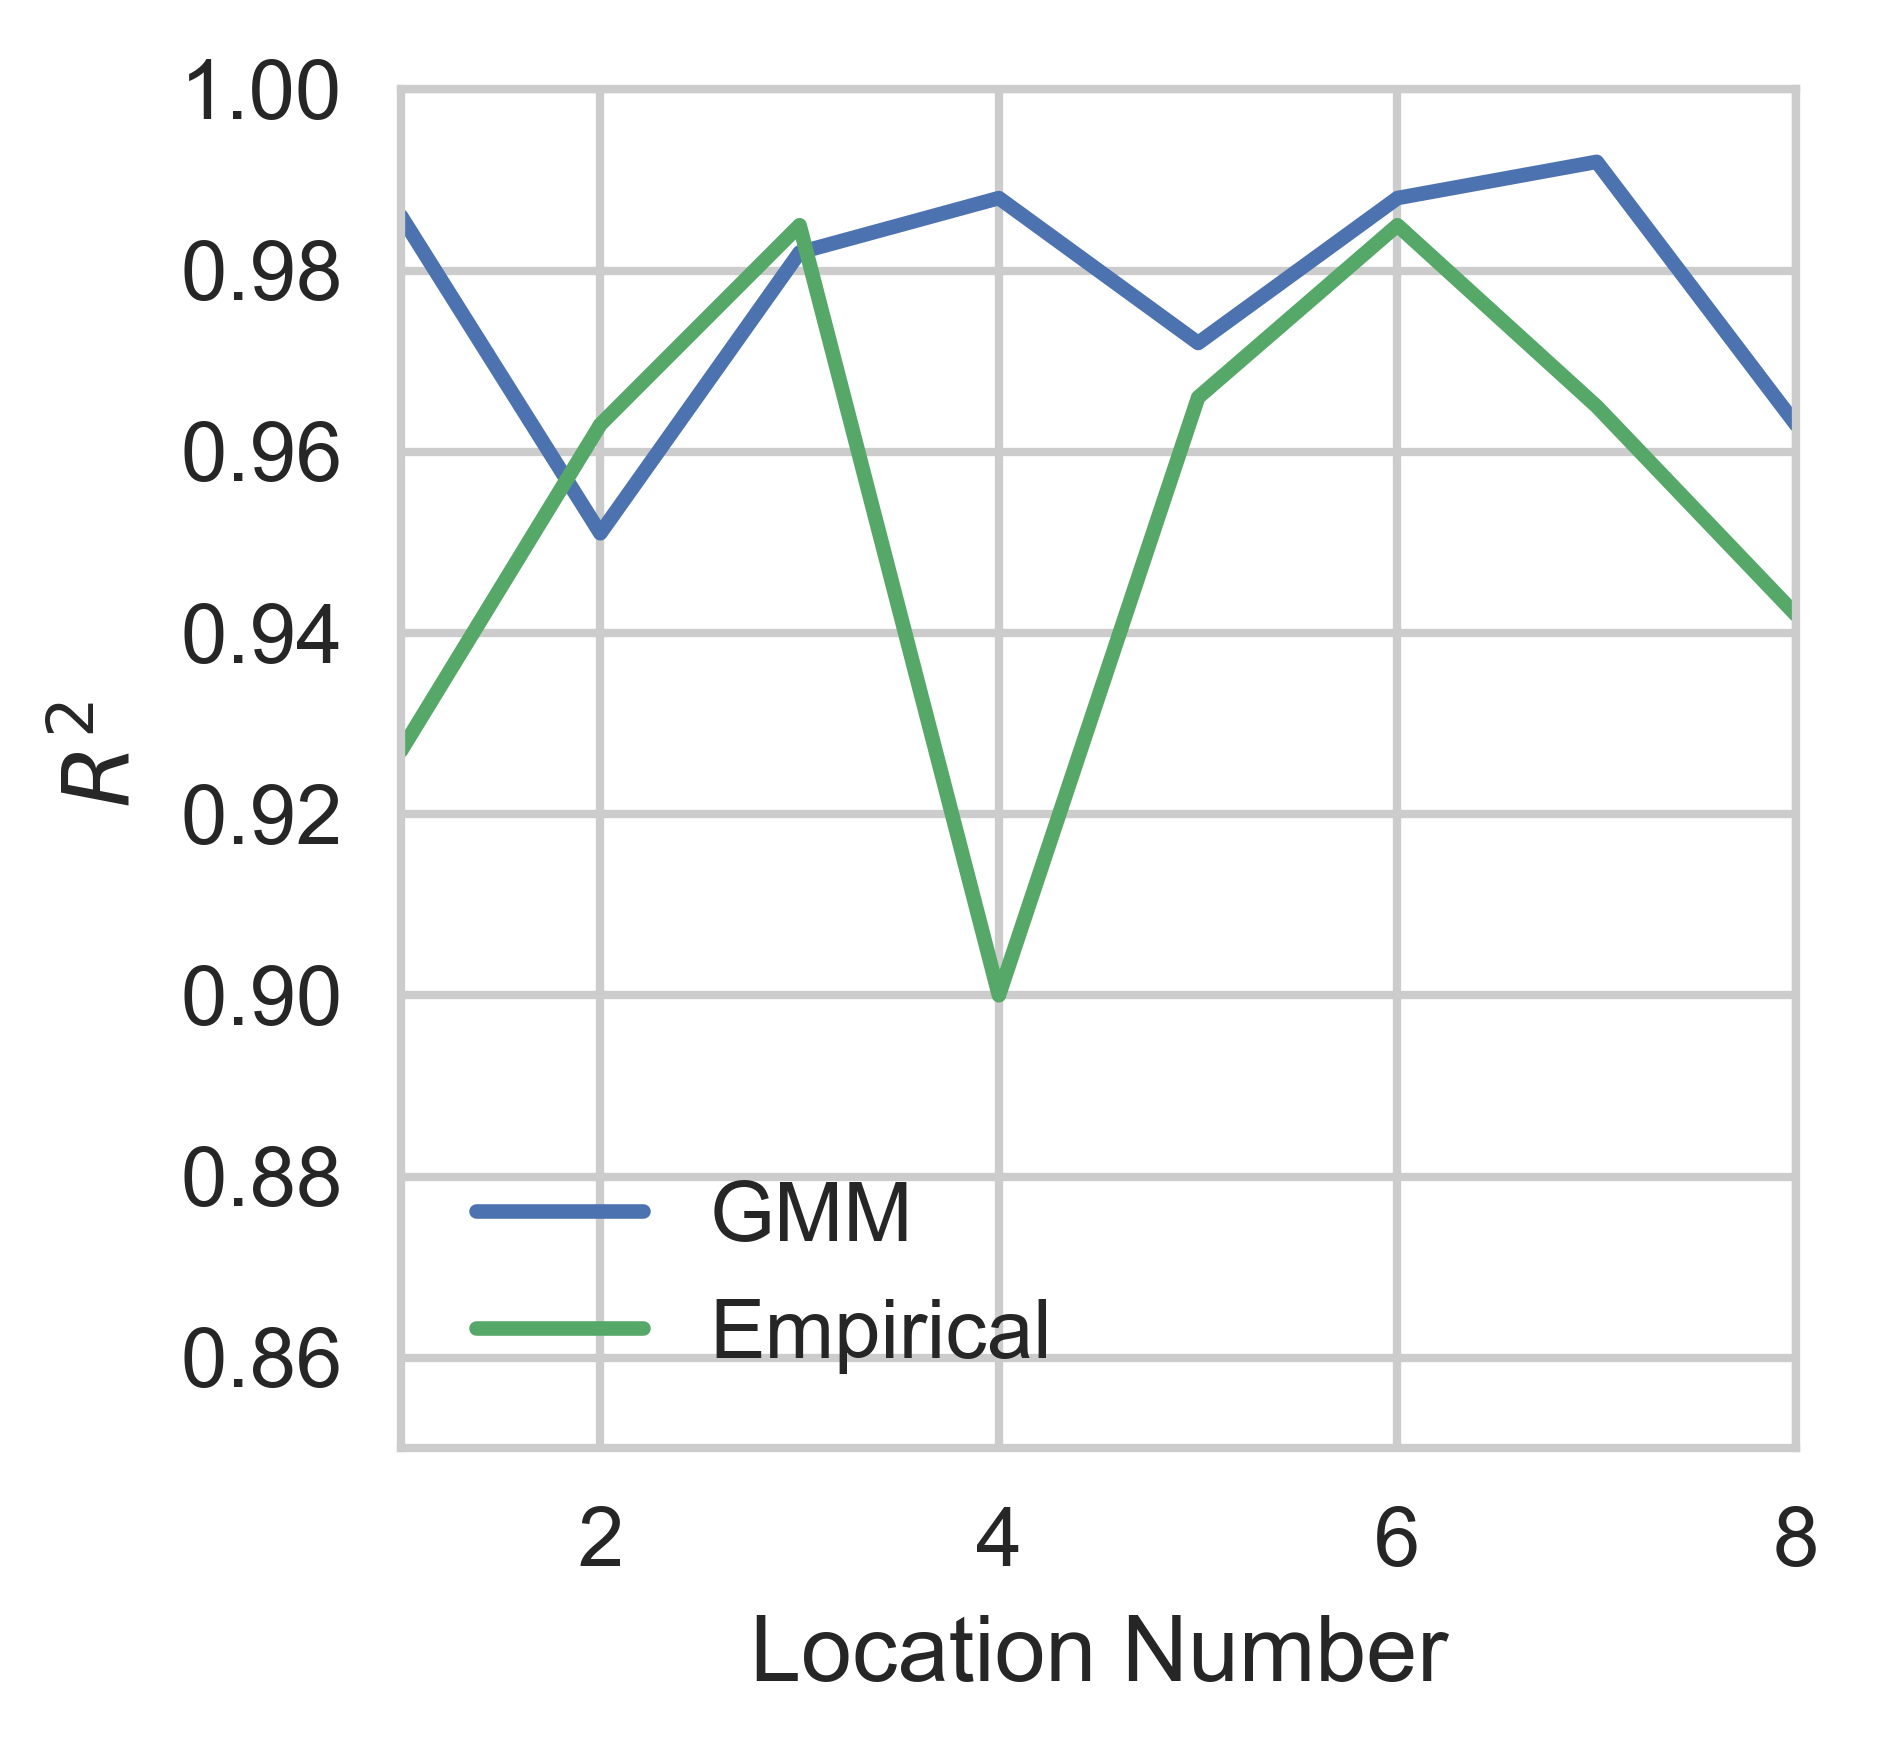

In [8]:
x=arange(1,9)
gmm_rquare = [0.977,0.994,0.996,0.952,0.986,0.996,0.987,0.937]
empirical_rsquare = [0.927,0.963,0.985,0.900,0.966,0.985,0.965,0.942]
plot(x, gmm_rsquare, label='GMM')
plot(x, empirical_rsquare, label='Empirical')
ylim = min(plt.gca().get_ylim()[0], .85)
plt.axis([1,8,ylim,1])
plt_configure(xlabel='Location Number', ylabel="$\ R^2$", legend=True, figsize=(3,3))
# plt.savefig("test.svg", format="svg")

In [12]:
from nbconvert import HTMLExporter, MarkdownExporter
import codecs
import nbformat
# exporter = HTMLExporter()
exporter = MarkdownExporter()
output_notebook = nbformat.read('playground.ipynb', as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open('test', 'w', encoding='utf-8').write(output)

In [9]:
sss

NameError: name 'sss' is not defined

In [ ]:
df = pd.read_csv('data.csv', header=0, skipinitialspace=True)
df

In [ ]:
df_resample=df.sample(n=8000, replace=True)
bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))

In [ ]:
%%time
from sklearn import grid_search

bandwidth_range = arange(0.7,2,0.2)
grid = grid_search.GridSearchCV(neighbors.KernelDensity(),
                {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

In [ ]:
%%time
from sklearn import model_selection  # too slow

bandwidth_range = arange(0.7,2,0.2)
grid = model_selection.GridSearchCV(neighbors.KernelDensity(),
                {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']

print(bandwidth)

In [ ]:
ssss

# Test Title

## Test Title 2

# Test Title 3

In [ ]:
sss

In [ ]:
for i in arange(0.4,1,0.1):
    print(i)

In [ ]:
pd.DataFrame([[1,2,3], [2,3,4]], index=[2,5])

In [ ]:
file_path='10_metre_surface.csv'
df = pd.read_csv(file_path, header=0, skipinitialspace=True)

In [ ]:
df

In [ ]:
df['speed']=np.sqrt(df.U**2+df.V**2)
df['dir']=np.degrees(np.arctan2(df.V, df.U))%360
df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
df['date']=df['time'].dt.strftime('%Y%m%d')
df['HrMn']=df['time'].dt.strftime('%H%m')
df.set_index(['time'], inplace=True)

In [ ]:
df['HrMn']

In [ ]:
df['2010':'2014']

In [ ]:
bins = arange(0, 20,0.5)
df['speed'].hist(bins=bins)

In [ ]:
bins = arange(0, 361)
df['dir'].hist(bins=bins)

In [ ]:
df.describe()

In [ ]:
sss

In [ ]:
figs = [try_plot(y) for y in arange(3)]

In [ ]:
from joblib import Parallel, delayed
figs = Parallel(n_jobs=-1)(delayed(try_plot)(y) for y in arange(3))

In [ ]:
s

In [ ]:
figs = Parallel(n_jobs=2)(delayed(try_plot)(y) for y in arange(4))

In [ ]:
sss

In [ ]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor

with open('test.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    
ep = ExecutePreprocessor(timeout=600, kernel_name='python3')

ep.preprocess(nb, {'metadata': {'path': './'}})

with open('executed_notebook.ipynb', 'wt') as f:
    nbformat.write(nb, f)

In [ ]:
a, b = np.radians([2, 5])

In [ ]:
a

In [ ]:
person1 = {'type': 1, 'name': 'Jhon', 'surname': 'Smith', 'phone': '555-1234'}
person2 = {'type': 2, 'name': 'Jannette', 'surname': 'Jhonson', 'phone': 1000000.00}

In [ ]:
pd.DataFrame([person1, person2])


In [ ]:
ssss

In [ ]:

file_dir = "./data/NCDC/europe/spain/gran_canaria/"
for file in os.listdir(file_dir):
    if file.endswith("stn.txt"):
        stn_file_path = file_dir+file
        print(file_path)

In [ ]:
with open(stn_file_path) as fp:
    for i, line in enumerate(fp):
        if i == 2:
            lat, long= line.split()[-3:-1]
            
lat, long = float(lat), float(long)
print(lat, long)

In [ ]:
import folium
map_osm = folium.Map(location=[lat, long], zoom_start=4)
folium.Marker([lat, long]).add_to(map_osm)
map_osm

In [ ]:
ssss

In [ ]:
file_path = 'D:/NDAWN/table.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

In [ ]:
df

In [ ]:
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

In [ ]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
df.to_csv('D:/NDAWN/baker_hr_avg.csv', index=False, float_format='%.2f')

In [ ]:
sss

In [ ]:
gmm = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.802,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311],]
speed_unit_text = ' (knot)'

In [ ]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [ ]:
x = [1,2,3,4]
y = [2,3,4,5]
plot(x, y )
plt_configure(xlabel="ln($V$)", ylabel="ln $P$")

In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])



In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True
df.plot.scatter(x='a', y='b')

In [ ]:
sss

In [ ]:
# mpl.style.use('ggplot')

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

In [ ]:
sss

In [ ]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
ax.set(xlabel='X Label', ylabel='Y Label', title='My Title')

In [ ]:
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
plt_configure(title = 'This is my title', figsize=(4,4), xlabel='X name', ylabel='Y name', legend=True)

In [ ]:
# fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
ax = plt.gca()
ax.set_title('This is my title')
ax.set_xlabel('X name')
ax.set_ylabel('Y name')
ax.legend()
plt.gcf().set_size_inches(4,4)

In [ ]:
mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']
# prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
x = [1,2,3,4,5]
y = [2,5,1,2,1]
y_menas = [3,3,3,3,3]
plot(x, y, '-', color=next(prop_cycle))
plot(x, y_menas, '--', color=next(prop_cycle))

In [ ]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

In [ ]:
len(np.linspace(0,30))

a, b, c = test = 25, 1,3

In [ ]:
test

In [ ]:
a

In [ ]:
df = pd.read_csv('test.txt', skipinitialspace=True, sep=' ', error_bad_lines=False,
                names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])
df

In [ ]:
df['dir'].apply(lambda x: str(x).isdigit())

In [ ]:
import pandas as pd
s = pd.Series(['0.55', '2', -3, '1234t1s1'])
pd.to_numeric(s, downcast='integer',errors='coerce' )

In [ ]:
s

In [ ]:
df = pd.read_csv('DSM/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

In [ ]:
df

In [ ]:
df['year'] = df['date'].apply(lambda x: str(x)[:6])
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
display(df[df.duplicated('date')])

In [ ]:
gmm_em_result = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.80,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311]]

In [ ]:
plot_gmm_ellipses(gmm_em_result)

In [ ]:
x=[1,2,3,4,5]
y=[4,5,5,2,1]
plot(x,y,'-')
plt.gca().set_xlim([1, 5])

In [ ]:
file_path = './data/NCDC/uk/tiree/dat.txt'
df = pd.read_csv(file_path,header=0, skipinitialspace=True)
df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
df = df[['date','HrMn','type','dir','speed','wind_type' ]]

In [ ]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 20000000) & (date < 20160000) ")

In [ ]:
# df = pd.read_csv('DSM/DSM.csv',header=0, skipinitialspace=True, dtype={'HrMn': object})
# df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
# df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
# df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
# df = df.dropna()
# df=df[['date','HrMn','dir','speed','dir_max','speed_max']]

In [ ]:
# df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
# df.dir = np.radians(df.dir)
# temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
# df.dir = np.degrees(df.dir)
# temp_df.dir = np.degrees(temp_df.dir)
# temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

In [ ]:
df

In [ ]:
def fit_weibul(df_speed):
    max_speed = df_speed.max()
    x = linspace(0, max_speed)
    data_size = len(df_speed)
    
    df_speed.hist(bins=arange(0, max_speed), alpha=0.5, label='Data', normed=True)  

    weibull_params = sp.stats.exponweib.fit(df_speed, floc=0, f0=1)
    y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
    plot(x, y_weibull, '--', color='black',label='Weibull') 

In [ ]:
temp_df = df

In [ ]:
for time_limit in [0, 20050000, 20100000]:
    plt.figure()
    df_speed=temp_df.query('date > @time_limit')['speed']
    fit_weibul(df_speed)
align_figures()

In [ ]:
sss

In [ ]:
temp_df

In [ ]:
temp_df2, speed_redistribution_info = randomize_speed(temp_df, 'up')

In [ ]:
fit_weibul(temp_df2)

In [ ]:
sss

In [ ]:
df_2016 = df.query('date >= 20150000 & date <= 20160000')

In [ ]:
# fit_weibul(df_2016)

In [ ]:
sss

In [ ]:
fig,ax = plt.subplots()

ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))

In [ ]:
ssss

In [ ]:
ssss

In [ ]:
sns.palplot(sns.color_palette("hls",10 ))

In [ ]:
sns.palplot(sns.color_palette("hls",6 ))

In [ ]:
sns.palplot(sns.color_palette("hls",4 ))

In [ ]:
sns.palplot(sns.color_palette("hls",3 ))

In [ ]:
sns.palplot(mpl.rcParams['axes.color_cycle'])

In [ ]:
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.palplot(sns.cubehelix_palette(reverse=True))

In [ ]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True, edgecolor = "black")

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle